In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('diamonds.csv')

In [3]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df.shape

(53940, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [6]:
df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [7]:
df.isnull().sum().sum()

0

In [8]:
df.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
price           int64
x             float64
y             float64
z             float64
dtype: object

In [9]:
df.nunique()

Unnamed: 0    53940
carat           273
cut               5
color             7
clarity           8
depth           184
table           127
price         11602
x               554
y               552
z               375
dtype: int64

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.shape

(53940, 11)

# one hot encoding

In [12]:
df_ohe = pd.get_dummies(df)

In [13]:
df_ohe.shape

(53940, 28)

In [14]:
df_ohe = df_ohe.iloc[:,1:]

In [15]:
df_ohe.fillna(df_ohe.median(), inplace=True)

In [16]:
df_ohe.columns

Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'cut_Fair',
       'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_D',
       'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J',
       'clarity_I1', 'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2'],
      dtype='object')

In [17]:
df_ohe.nunique()

carat              273
depth              184
table              127
price            11602
x                  554
y                  552
z                  375
cut_Fair             2
cut_Good             2
cut_Ideal            2
cut_Premium          2
cut_Very Good        2
color_D              2
color_E              2
color_F              2
color_G              2
color_H              2
color_I              2
color_J              2
clarity_I1           2
clarity_IF           2
clarity_SI1          2
clarity_SI2          2
clarity_VS1          2
clarity_VS2          2
clarity_VVS1         2
clarity_VVS2         2
dtype: int64

In [18]:
df_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   carat          53940 non-null  float64
 1   depth          53940 non-null  float64
 2   table          53940 non-null  float64
 3   price          53940 non-null  int64  
 4   x              53940 non-null  float64
 5   y              53940 non-null  float64
 6   z              53940 non-null  float64
 7   cut_Fair       53940 non-null  bool   
 8   cut_Good       53940 non-null  bool   
 9   cut_Ideal      53940 non-null  bool   
 10  cut_Premium    53940 non-null  bool   
 11  cut_Very Good  53940 non-null  bool   
 12  color_D        53940 non-null  bool   
 13  color_E        53940 non-null  bool   
 14  color_F        53940 non-null  bool   
 15  color_G        53940 non-null  bool   
 16  color_H        53940 non-null  bool   
 17  color_I        53940 non-null  bool   
 18  color_

# X & Y split 

In [19]:
X = df_ohe
X.head()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,False,False,True,...,False,False,False,False,False,True,False,False,False,False
1,0.21,59.8,61.0,326,3.89,3.84,2.31,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,0.23,56.9,65.0,327,4.05,4.07,2.31,False,True,False,...,False,False,False,False,False,False,True,False,False,False
3,0.29,62.4,58.0,334,4.20,4.23,2.63,False,False,False,...,True,False,False,False,False,False,False,True,False,False
4,0.31,63.3,58.0,335,4.34,4.35,2.75,False,True,False,...,False,True,False,False,False,True,False,False,False,False


In [20]:
X.shape

(53940, 27)

# train test split

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, = train_test_split(X, test_size=0.3, random_state=7)

In [23]:
X_train.shape, X_test.shape

((37758, 27), (16182, 27))

# k-means clustering

In [24]:
from sklearn.cluster import KMeans

In [25]:
mykmeans = KMeans(3, random_state=7)
# bcoz user has given k=3 i.e. 3 clusters 
# it is calculating 3 centroids and calculate distance from those 3 

In [26]:
mykmeans.fit(X_train)

C:\Users\alish\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=7)

In [27]:
# do the predictions/testing
cluster_nos = mykmeans.predict(X_test)

In [28]:
X_test.iloc[0,:]

carat             0.53
depth             63.2
table             55.0
price             1110
x                 5.17
y                 5.18
z                 3.27
cut_Fair         False
cut_Good         False
cut_Ideal        False
cut_Premium      False
cut_Very Good     True
color_D          False
color_E          False
color_F           True
color_G          False
color_H          False
color_I          False
color_J          False
clarity_I1       False
clarity_IF       False
clarity_SI1      False
clarity_SI2       True
clarity_VS1      False
clarity_VS2      False
clarity_VVS1     False
clarity_VVS2     False
Name: 40026, dtype: object

In [29]:
cluster_nos[0]

2

In [30]:
cluster_nos.shape, X_test.shape

((16182,), (16182, 27))

In [31]:
X_test.loc[cluster_nos==0,:].shape

(4651, 27)

In [32]:
X_test.loc[cluster_nos==1,:].shape

(1686, 27)

In [33]:
X_test.loc[cluster_nos==2,:].shape

(9845, 27)

In [34]:
inertia_values = []
for k in range(2,31):
    mykmeans = KMeans(k,random_state=7)
    mykmeans.fit(X_train)
    inertia_values.append(mykmeans.inertia_)

C:\Users\alish\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\alish\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\alish\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\alish\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

In [35]:
inertia_values

[171597904834.22144,
 72428987371.87973,
 39904558737.50986,
 26192836423.978462,
 17680892885.436028,
 12718605013.623058,
 9869348677.149767,
 7716769227.599121,
 6314177003.289905,
 5235797041.25178,
 4389797878.270631,
 3818179333.6357565,
 3312124985.6249895,
 2824590550.992313,
 2470589296.9696407,
 2189527133.740919,
 1968183438.8090777,
 1767310958.865067,
 1609333382.0061524,
 1455092391.8936188,
 1311886722.220217,
 1210019915.5244658,
 1103142374.647233,
 1022928874.637912,
 942654736.9721,
 880239136.3142151,
 816553426.4458884,
 766935865.6112851,
 704889567.9784925]

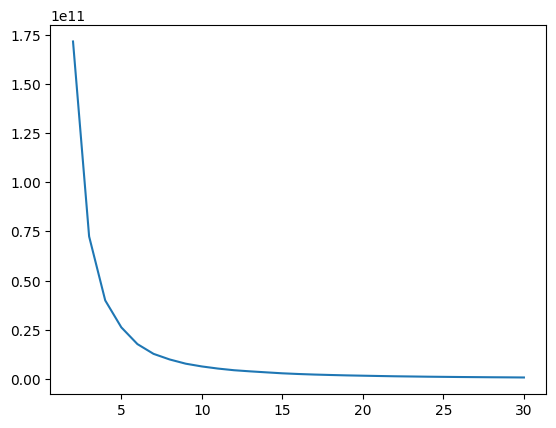

In [36]:
import matplotlib.pyplot as plt
plt.plot(list(range(2,31)), inertia_values)

# evaluation parameters

In [37]:
from sklearn.metrics import silhouette_score

In [38]:
# two parameters to silhouette_score
# X : X_test data
# labels : cluster numbers predicted by the algorithm

silhouette_score(X_test, cluster_nos)

0.6628169304076931

# DBSCAN

In [39]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X) # standardization

Number of clusters: 238
Outliers : 1400


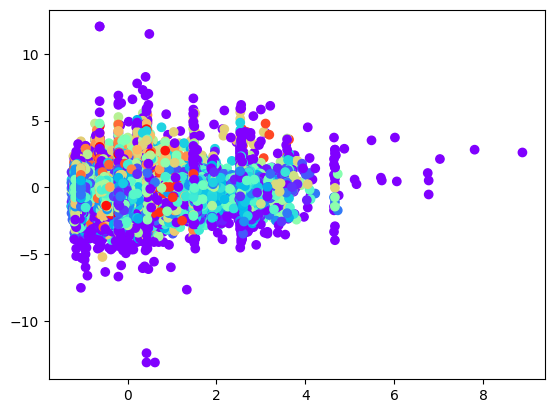

In [40]:
y_pred = DBSCAN(eps=2, min_samples=10).fit_predict(X)
import numpy as np
print('Number of clusters: {}'.format(len(set(y_pred[np.where(y_pred != -1)]))))
print('Outliers :', len(y_pred[np.where(y_pred == -1)]))
plt.scatter(X[:,0], X[:,1], c=y_pred, cmap='rainbow')

# Knee finding in DBSCAN

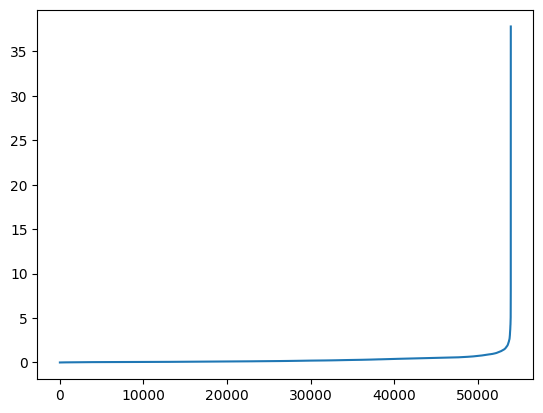

In [41]:
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [42]:
# this knee graph must be perfect right angle